## Data Analysis

In [1]:
# Importing required packages
import pandas as pd
import numpy as np

import os
import sys
import random

import plotly.express as px
import matplotlib.pyplot as plt
from IPython.display import Audio

import librosa
import librosa.display

import warnings
if not sys.warnoptions:
    warnings.simplefilter("ignore")
warnings.filterwarnings("ignore", category=DeprecationWarning) 

In [2]:
dataset = pd.read_csv("./data/dataset.csv")
dataset.head()

Emotions                                               Path
0  neutral  ./data/Ravdess/audio_speech_actors_01-24/Actor...
1  neutral  ./data/Ravdess/audio_speech_actors_01-24/Actor...
2  neutral  ./data/Ravdess/audio_speech_actors_01-24/Actor...
3  neutral  ./data/Ravdess/audio_speech_actors_01-24/Actor...
4     calm  ./data/Ravdess/audio_speech_actors_01-24/Actor...

First let's plot the count of each emotions in our dataset.

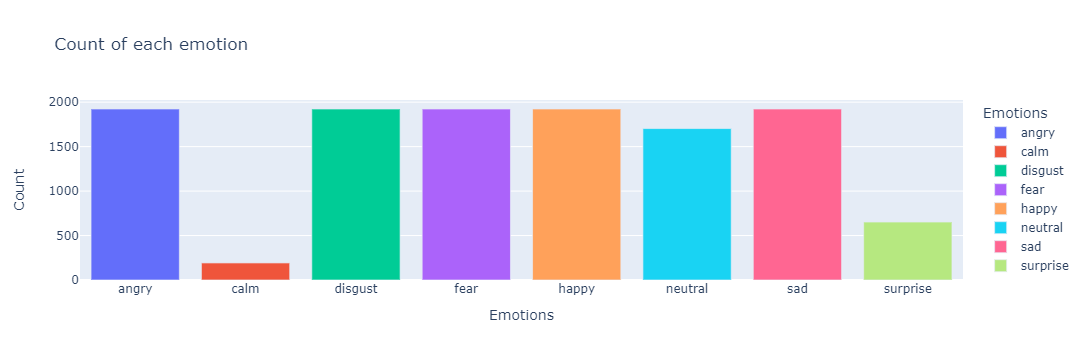

In [3]:
count_df = dataset.groupby('Emotions').count().reset_index().rename(columns={'Path': 'Count'})

fig = px.bar(count_df, x='Emotions', y='Count', color='Emotions', title="Count of each emotion")
fig.show()

Inference:
- The plot shows 8 different emotions from our dataset.
- The dataset is well distributed except for _calm_ and _surprise_ emotions.

We can also plot waveplots and spectograms for audio signals

* **Waveplots** - Waveplots let us know the loudness of the audio at a given time.
* **Spectograms** - A spectrogram is a visual representation of the spectrum of frequencies of sound or other signals as they vary with time. It’s a representation of frequencies changing with respect to time for given audio/music signals.

In [4]:
def create_waveplot(data, sr, e):
    plt.figure(figsize=(10, 3))
    plt.title('Waveplot for audio with {} emotion'.format(e), size=15)
    librosa.display.waveshow(data, sr=sr)
    plt.show()

def create_spectrogram(data, sr, e):
    # stft function converts the data into short term fourier transform
    X = librosa.stft(data)
    Xdb = librosa.amplitude_to_db(abs(X))
    plt.figure(figsize=(12, 3))
    plt.title('Spectrogram for audio with {} emotion'.format(e), size=15)
    librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='hz')   
    plt.colorbar()

In [5]:
def create_plots(emotion):
    # get random value from dataset
    try:
        path = np.random.choice(np.array(dataset.Path[dataset.Emotions==emotion]))
    except ValueError as error:
        print("Error retriving values for:", emotion)
        print("Error message:", error)
        return
    print("File at path:",path)
    data, sampling_rate = librosa.load(path)
    create_waveplot(data, sampling_rate, emotion)
    create_spectrogram(data, sampling_rate, emotion)
    display(Audio(path))

Let's plot the waveplot and spectrogram for each emotion in the dataset.

1. Angry

File at path: ./data/Crema/1051_TAI_ANG_XX.wav


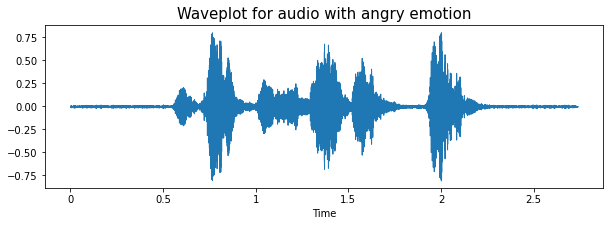

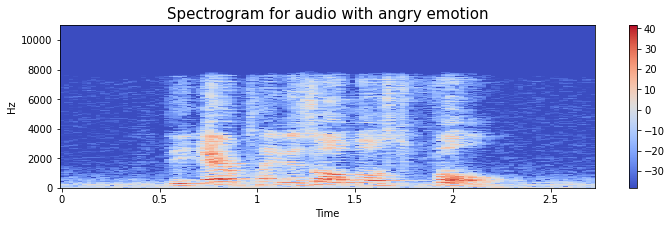

In [6]:
create_plots("angry")

2. Calm

File at path: ./data/Ravdess/audio_speech_actors_01-24/Actor_12/03-01-02-02-01-01-12.wav


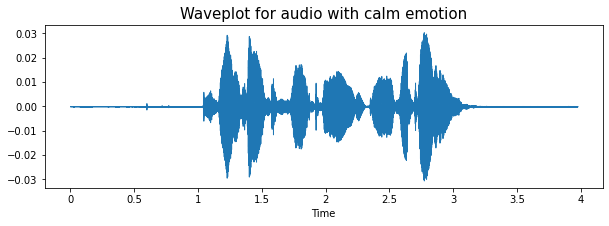

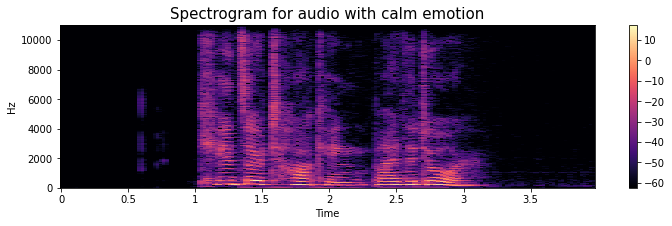

In [7]:
create_plots("calm")

3. Disgust

File at path: ./data/Ravdess/audio_speech_actors_01-24/Actor_19/03-01-07-01-01-01-19.wav


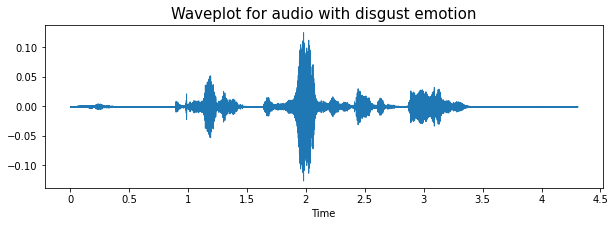

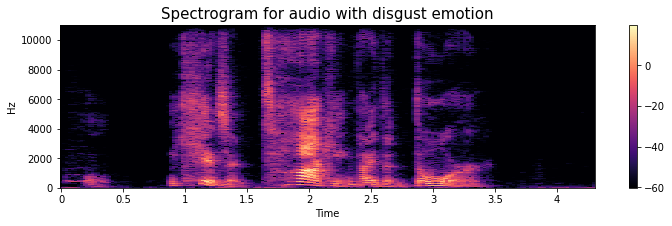

In [8]:
create_plots("disgust")

4. Fear

File at path: ./data/Savee/KL_f15.wav


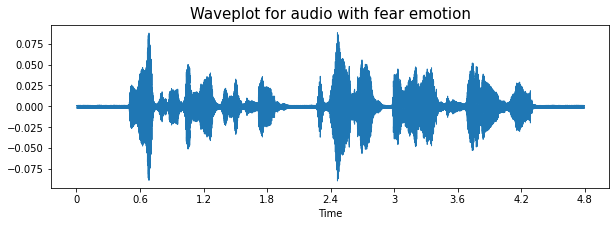

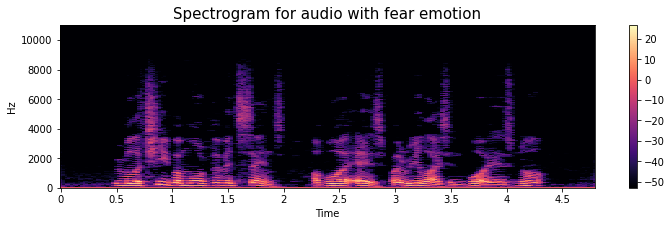

In [9]:
create_plots("fear")

5. Happy

File at path: ./data/Crema/1026_DFA_HAP_XX.wav


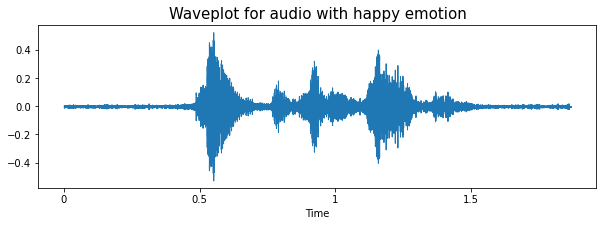

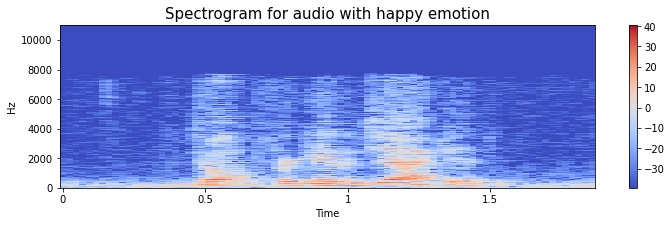

In [10]:
create_plots("happy")

6. Neutral

File at path: ./data/Crema/1065_TAI_NEU_XX.wav


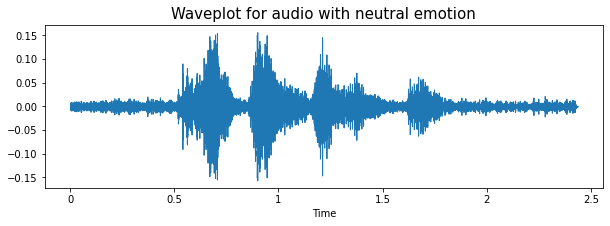

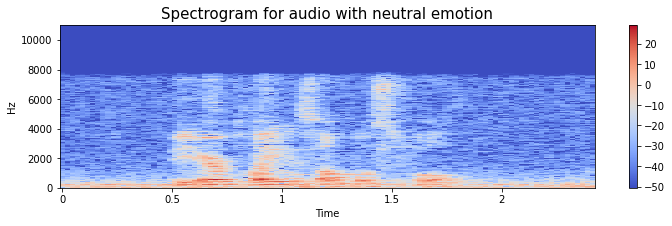

In [11]:
create_plots("neutral")

7. Sad

File at path: ./data/Crema/1056_IEO_SAD_LO.wav


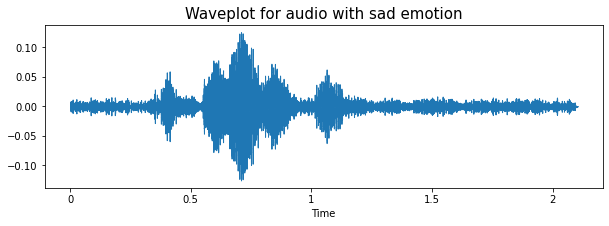

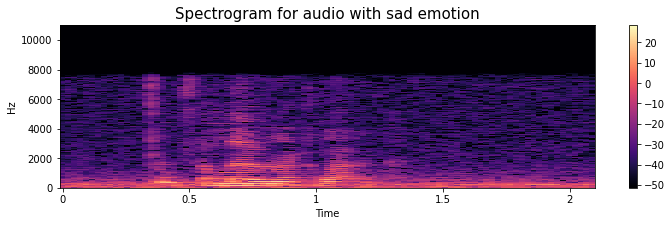

In [12]:
create_plots("sad")

8. Surprise

File at path: ./data/Tess/YAF_pleasant_surprised/YAF_name_ps.wav


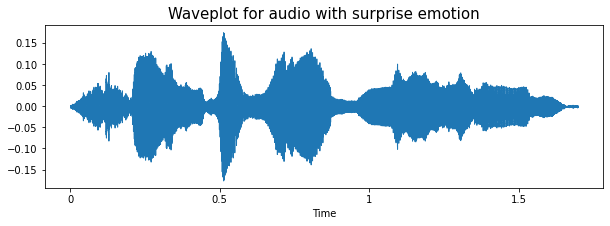

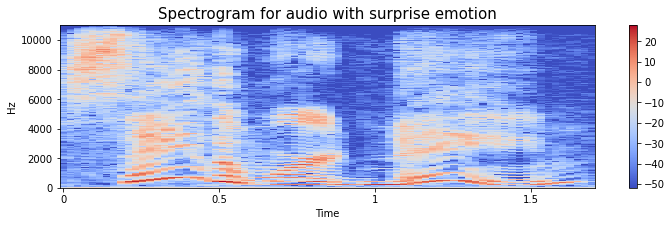

In [13]:
create_plots("surprise")

#### Data Augmentation

In this process we create new synthetic data samples by adding small perturbations on our initial training set. The objective is to make our model invariant to those perturbations and enhace its ability to generalize. In order to this to work adding the perturbations must conserve the same label as the original training sample.

For the scope of this analysis we will add the following changes to our audio files:
- Noise
- Stretch
- Shift
- Pitch

In [14]:
def noise(data):
    noise_amp = 0.035*np.random.uniform()*np.amax(data)
    data = data + noise_amp*np.random.normal(size=data.shape[0])
    return data

def stretch(data, rate=0.8):
    return librosa.effects.time_stretch(data, rate)

def shift(data):
    shift_range = int(np.random.uniform(low=-5, high = 5)*1000)
    return np.roll(data, shift_range)

def pitch(data, sampling_rate, pitch_factor=0.7):
    return librosa.effects.pitch_shift(data, sampling_rate, pitch_factor)

In [15]:
# taking any example and checking for techniques.
example_row = dataset.sample()
path = example_row.Path.values[0]
emotion = example_row.Emotions.values[0]
data, sample_rate = librosa.load(path)

1. Original Audio

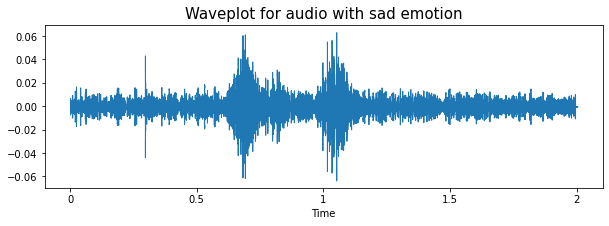

In [16]:
create_waveplot(data, sample_rate, emotion)
Audio(path)

2. Audio with Noise

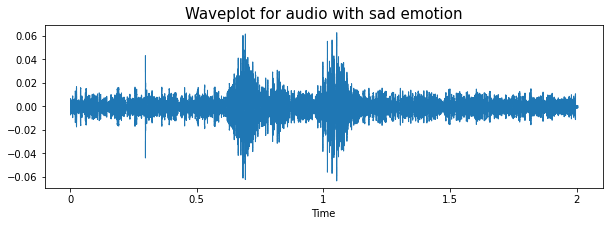

In [17]:
audio_with_noise = noise(data)
create_waveplot(audio_with_noise, sample_rate, emotion)
Audio(audio_with_noise, rate=sample_rate)

3. Audio with Stretch

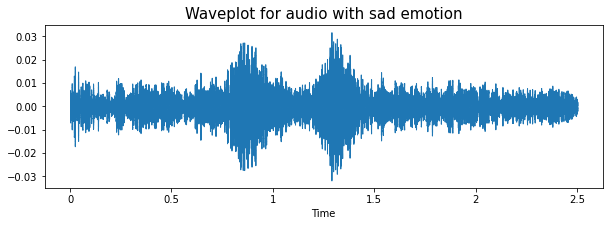

In [18]:
audio_with_stretch = stretch(data)
create_waveplot(audio_with_stretch, sample_rate, emotion)
Audio(audio_with_stretch, rate=sample_rate)

4. Audio with Shift

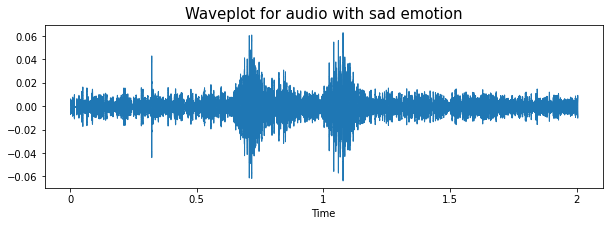

In [19]:
audio_with_shift = shift(data)
create_waveplot(audio_with_shift, sample_rate, emotion)
Audio(audio_with_shift, rate=sample_rate)

5. Audio with Noise

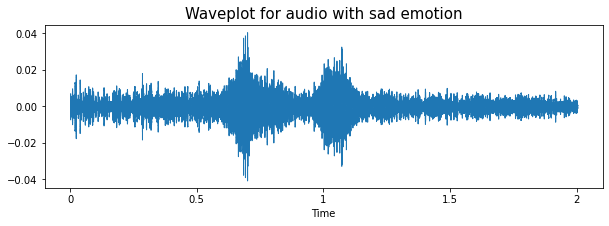

In [20]:
audio_with_pitch = pitch(data, sample_rate)
create_waveplot(audio_with_pitch, sample_rate, emotion)
Audio(audio_with_pitch, rate=sample_rate)

### Conclusion:
1. The dataset is well distributed for all the labels/classes (except for _calm_ and _surprise_ emotions).
2. The length for all audio files varies between 2.5 to 3 seconds where the first few milliseconds provide no help in classifying it.
3. Adding perturbations to our audio data will enhance the model's ability to generalize and thus adding noise, stretch, shift and pitch will help us achieve this goal.